# AI PROJECT: Linear Regression of REAL ESTATE KAGGLE DATA SET
## MUHAMMAD MOID
## ROLL NO: 2K2O-BSCS-126

In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Read the dataset
dataset = pd.read_csv("Real estate.csv")
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [30]:
# Perform missing value analysis
dataset.isnull()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


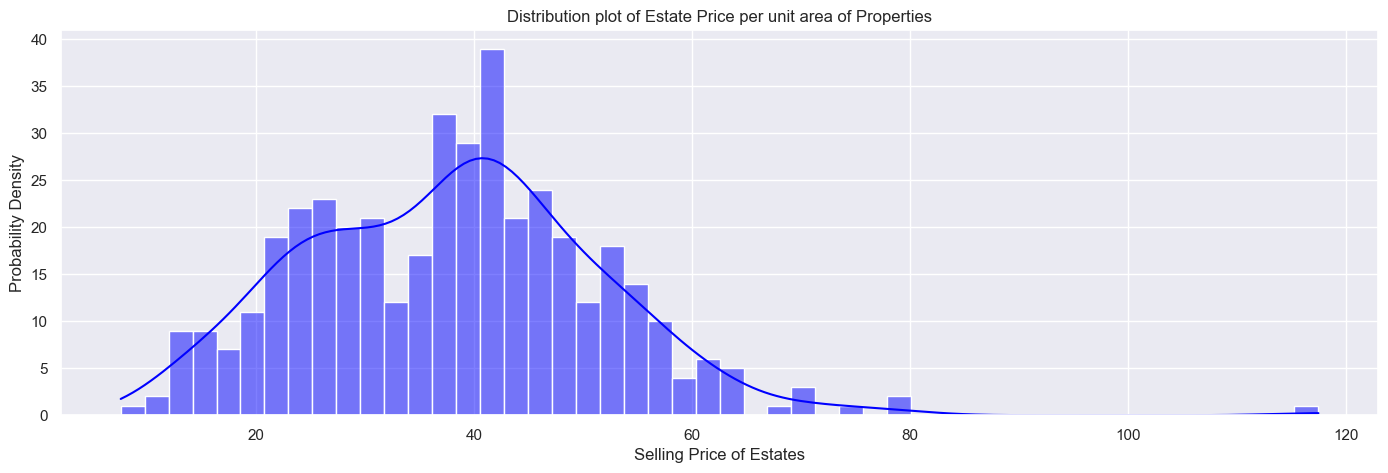

In [28]:
# Plot the distribution of house prices
sns.set(rc={"figure.figsize":(17, 5)})
sns.histplot(dataset['Y house price of unit area'], kde=True, bins=50, color='blue', stat='count')
plt.title("Distribution plot of Estate Price per unit area of Properties")
plt.xlabel("Selling Price of Estates")
plt.ylabel("Probability Density")
plt.show()

In [29]:
# Perform correlation analysis
dataset.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [11]:
# Select features and target variable
# X = dataset.drop('Y house price of unit area', axis=1)
X = dataset['X4 number of convenience stores'].values.reshape(-1,1)
y = dataset['Y house price of unit area']

In [12]:

# Perform train-test split on the DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [17]:
# Create and train a linear regression model
model_LR = LinearRegression(fit_intercept=False,n_jobs=-1)
model_LR.fit(X_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=-1)

In [18]:
# Make predictions
y_pred = model_LR.predict(X_test)
y_pred

array([42.09217838, 35.07681532,  7.01536306,  7.01536306, 21.04608919,
       56.12290451, 35.07681532, 35.07681532,  0.        , 63.13826757,
       21.04608919, 21.04608919, 14.03072613,  0.        , 28.06145225,
       14.03072613, 56.12290451, 49.10754144, 28.06145225, 49.10754144,
        7.01536306, 21.04608919, 35.07681532, 42.09217838,  0.        ,
        7.01536306,  0.        ,  7.01536306, 35.07681532, 28.06145225,
        0.        , 21.04608919, 42.09217838,  7.01536306, 42.09217838,
        0.        , 63.13826757,  0.        , 70.15363063, 56.12290451,
       14.03072613, 28.06145225, 70.15363063, 14.03072613, 35.07681532,
       49.10754144, 56.12290451,  0.        , 49.10754144, 70.15363063,
       42.09217838, 35.07681532, 49.10754144, 49.10754144, 21.04608919,
        0.        , 35.07681532,  7.01536306, 21.04608919, 35.07681532,
       21.04608919, 14.03072613,  0.        ,  0.        ,  7.01536306,
       21.04608919,  7.01536306, 63.13826757, 14.03072613,  7.01

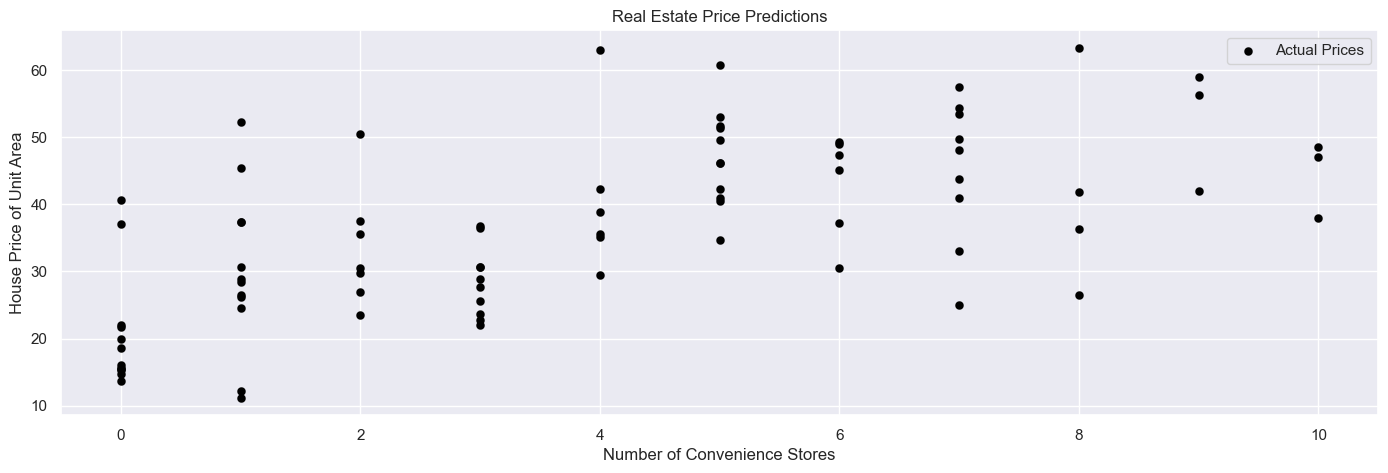

In [24]:
# Plot actual vs predicted prices
plt.scatter(X_test, y_test, color='black',linewidth=0.1, label='Actual Prices')
# plt.plot(X_test, y_pred, color='red', linewidth=0.4, label='Predicted Prices')
# plt.scatter(X_test, y_pred, color='red', linewidth=0.1, label='Predicted Prices')
plt.title("Real Estate Price Predictions")
plt.xlabel("Number of Convenience Stores")
plt.ylabel("House Price of Unit Area")
plt.legend()
plt.grid(True)
plt.show()

This code plots the actual prices (y_test) against the predicted prices (y_pred). The x-axis represents the "Number of Convenience Stores," and the y-axis represents the "House Price of Unit Area." The actual prices are shown as black dots, and the predicted prices are connected by a red line.

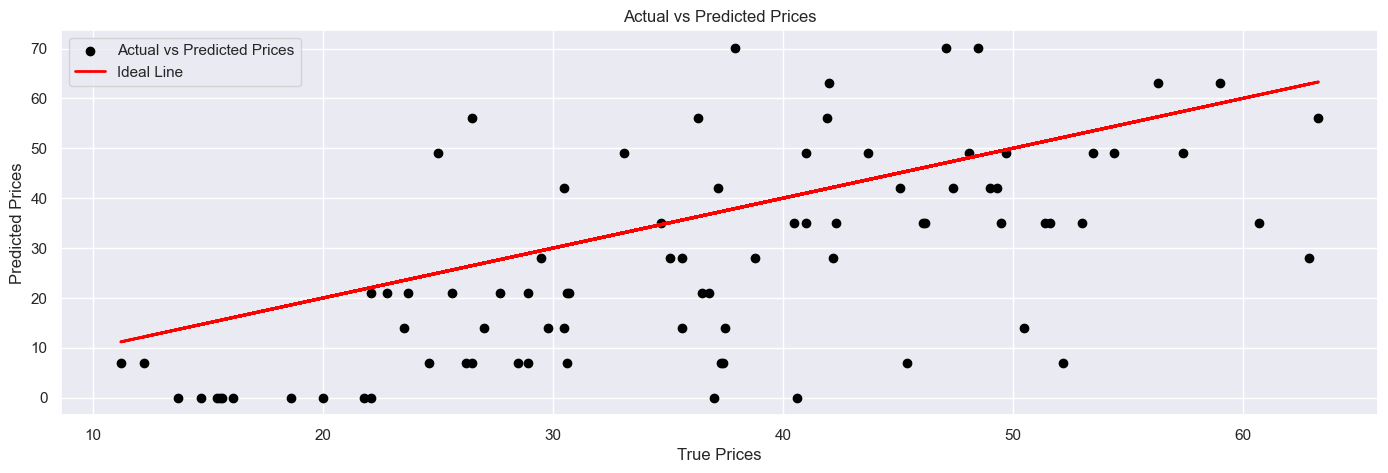

In [20]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred, color='black', label='Actual vs Predicted Prices')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Ideal Line')

plt.title("Actual vs Predicted Prices")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid(True)

plt.show()



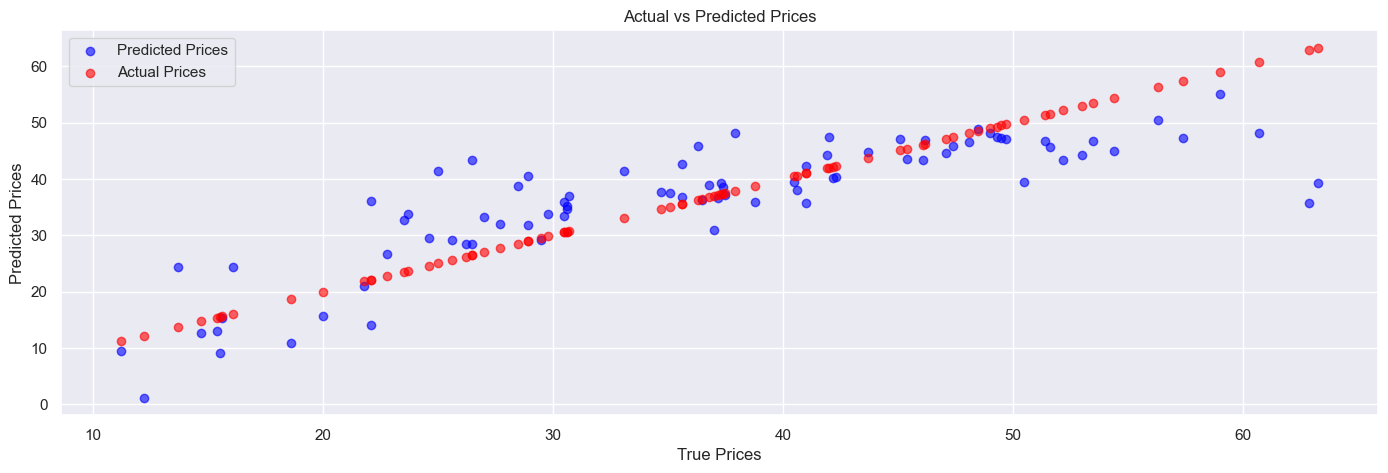

In [13]:
# Plot actual vs predicted prices with differentiated colors
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices', alpha=0.6)
plt.scatter(y_test, y_test, color='red', label='Actual Prices', alpha=0.6)


plt.title("Actual vs Predicted Prices")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid(True)

plt.show()


This code also plots the actual prices (y_test) against the predicted prices (y_pred). However, it differentiates the points by using different colors. The predicted prices are shown as blue dots, and the actual prices are shown as red dots. The x-axis represents the "True Prices," and the y-axis represents the "Predicted Prices."

In [14]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)


Mean Squared Error (MSE): 54.60196067337408
Mean Absolute Error (MAE): 5.418035098628801


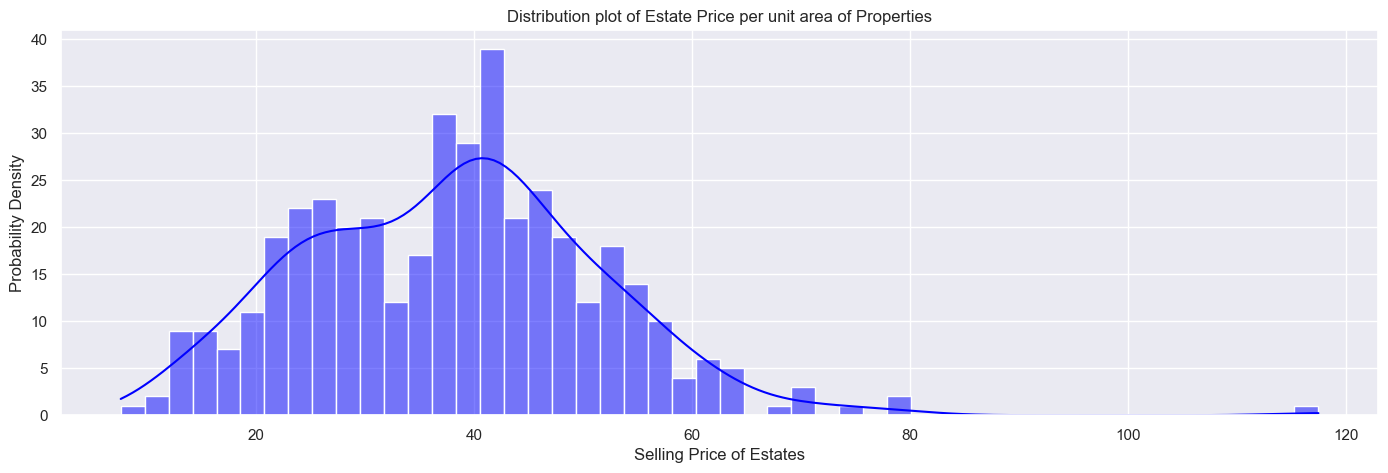

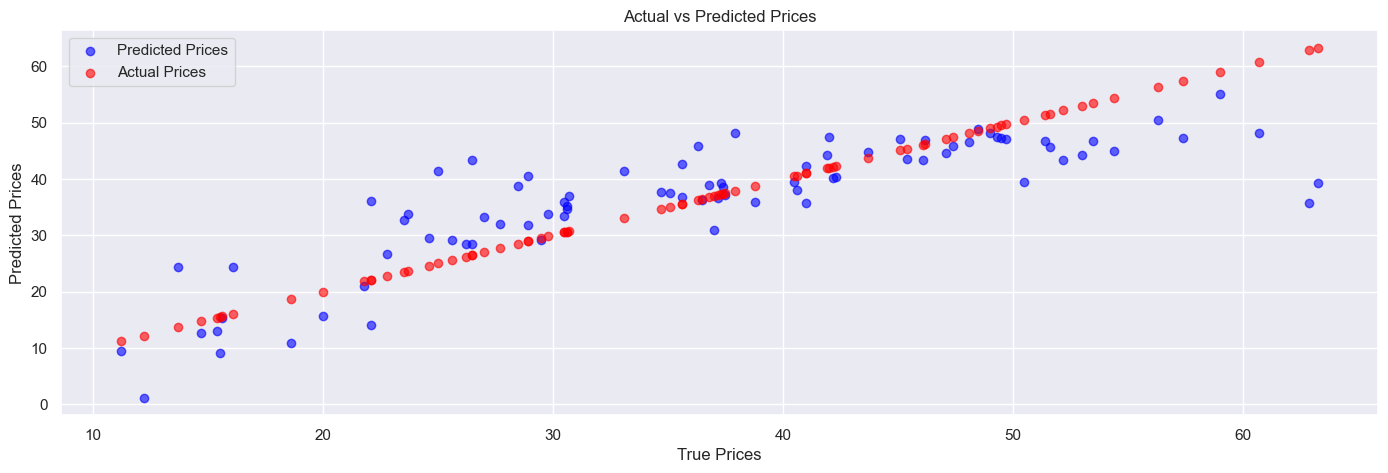

Mean Squared Error (MSE): 54.60196067337408
Mean Absolute Error (MAE): 5.418035098628801


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
dataset = pd.read_csv("Real estate.csv")

# Perform missing value analysis
dataset.isnull().sum()

# Plot the distribution of house prices
sns.histplot(dataset['Y house price of unit area'], kde=True, bins=50, color='blue', stat='count')
plt.title("Distribution plot of Estate Price per unit area of Properties")
plt.xlabel("Selling Price of Estates")
plt.ylabel("Probability Density")
plt.show()

# Perform correlation analysis
dataset.corr()

# Select features and target variable
X = dataset.drop('Y house price of unit area', axis=1)
y = dataset['Y house price of unit area']

# Perform train-test split on the DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

# Create and train a linear regression model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Make predictions
y_pred = model_LR.predict(X_test)

# Plot actual vs predicted prices with differentiated colors
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices', alpha=0.6)
plt.scatter(y_test, y_test, color='red', label='Actual Prices', alpha=0.6)

plt.title("Actual vs Predicted Prices")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid(True)

plt.show()

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)


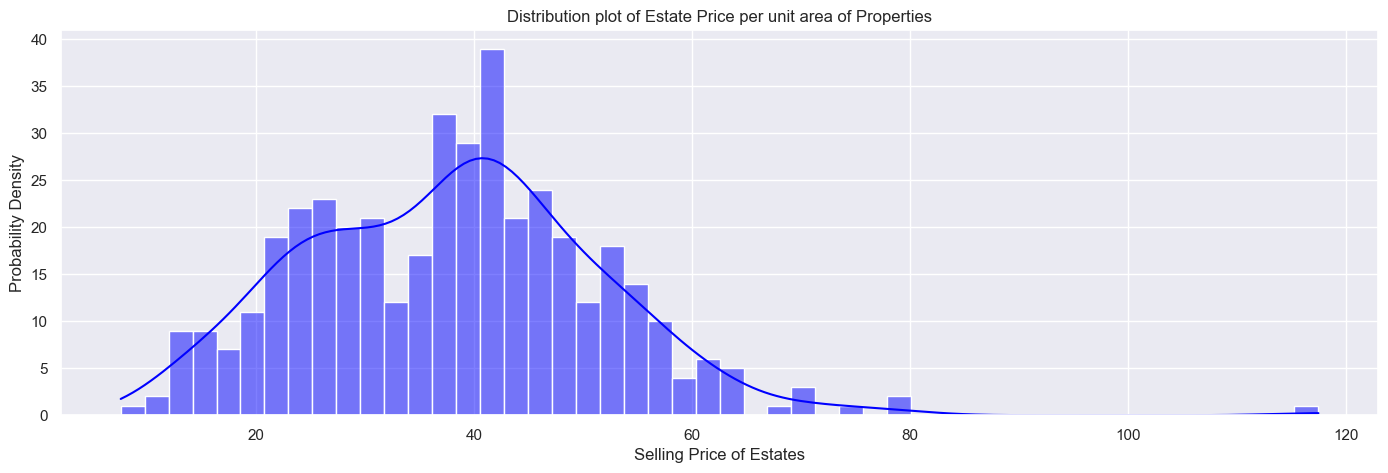

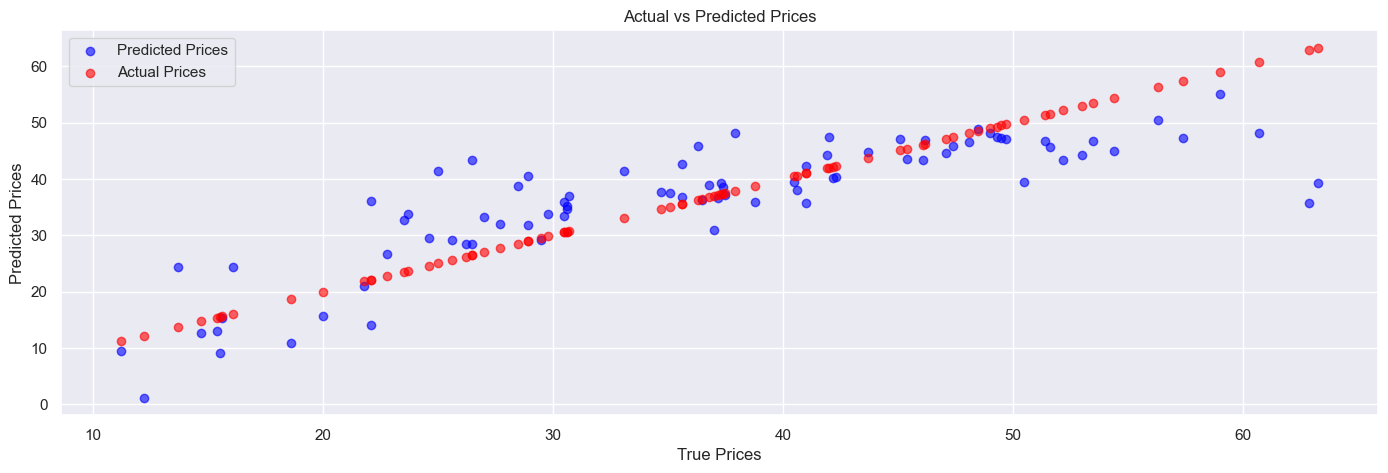

Mean Squared Error (MSE): 54.60196067337408
Mean Absolute Error (MAE): 5.418035098628801


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
dataset = pd.read_csv("Real estate.csv")

# Perform missing value analysis
dataset.isnull().sum()

# Plot the distribution of house prices
sns.histplot(dataset['Y house price of unit area'], kde=True, bins=50, color='blue', stat='count')
plt.title("Distribution plot of Estate Price per unit area of Properties")
plt.xlabel("Selling Price of Estates")
plt.ylabel("Probability Density")
plt.show()

# Perform correlation analysis
dataset.corr()

# Select features and target variable
X = dataset.drop('Y house price of unit area', axis=1)
y = dataset['Y house price of unit area']

# Perform train-test split on the DataFrame
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

# Create and train a linear regression model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Make predictions
y_pred_test = model_LR.predict(X_test)

# Plot actual vs predicted prices with differentiated colors
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted Prices', alpha=0.6)
plt.scatter(y_test, y_test, color='red', label='Actual Prices', alpha=0.6)
plt.title("Actual vs Predicted Prices")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
